# Ordnance Survey tiles

We also support tiles from the UK Ordnance Survey, currently only those which are freely available:

- [OS VectorMap District](https://www.ordnancesurvey.co.uk/business-and-government/products/vectormap-district.html) each tile is 4000x4000 pixels and represents 10km square.
- [OS OpenMap Local](https://www.ordnancesurvey.co.uk/business-and-government/products/os-open-map-local.html) each tile is 
5000x5000 pixels and represents 5km square.

We also support some larger scale maps:

- [250k Raster Maps](https://www.ordnancesurvey.co.uk/business-and-government/products/250k-raster.html) each tile is 4000x4000 pixels, and represents 100km square.
- [MiniScale](https://www.ordnancesurvey.co.uk/business-and-government/products/miniscale.html) is a selection of single images showing the whole UK, of size 7000 x 13000.  We convert this to tiles of size 1000x1000 pixels, each representing 100km square.
- [Overview](https://www.ordnancesurvey.co.uk/business-and-government/products/gb-overview-maps.html) is a view of the UK and its immediate european neighbours.  We convert this to tiles of size 200x200 pixels, each representing 100km square.

The data is released under [Open Government Licence](https://www.ordnancesurvey.co.uk/business-and-government/licensing/using-creating-data-with-os-products/os-opendata.html), [Licence wording](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/): "Contains OS data © Crown copyright and database right (2017)"

Tiles should be downloaded, the ZIP files expanded, and placed in a directory.  We offer a simple initialisation step whereby a single directory needs to be given, and then all sub-directories are searched.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import tilemapbase
import os

datadir = os.path.join("..", "..", "..", "Data", "OS_OpenMap")
tilemapbase.ordnancesurvey.init(datadir)

In [2]:
# We have only downloaded and unzipped the files necessary for this notebook to run.
tilemapbase.ordnancesurvey.OpenMapLocal.found_tiles()

{'ND', 'SE', 'SW'}

In [3]:
tilemapbase.ordnancesurvey.VectorMapDistrict.found_tiles()

{'ND', 'SE', 'SW'}

In this example, we plot the University of Leeds campus, with the corner of the Geography building, the corner of the Gym, and the centre of the Arts library shown.  (To be compared with e.g. Google Maps showing our projection is correct.)

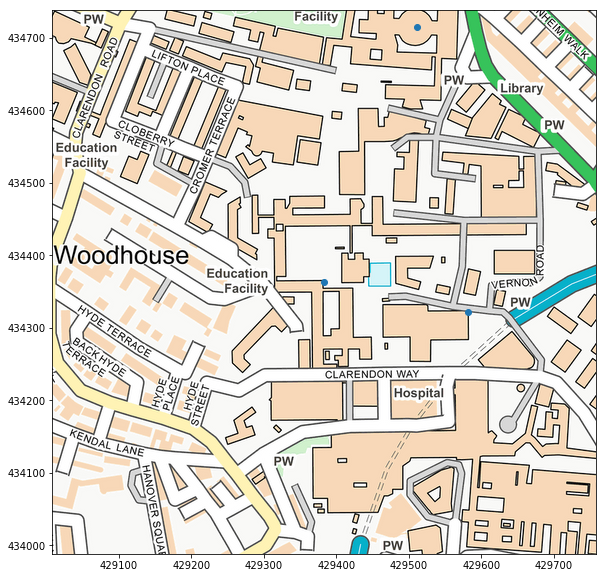

In [4]:
ex = tilemapbase.ordnancesurvey.Extent.from_centre_lonlat(-1.55532, 53.80474, xsize=750)
source = tilemapbase.ordnancesurvey.OpenMapLocal()
plotter = tilemapbase.ordnancesurvey.Plotter(ex, source)

fig, ax = plt.subplots(figsize=(10,10))
plotter.plot(ax)

x, y = tilemapbase.ordnancesurvey.project(-1.55532, 53.80474)
x1, y1 = tilemapbase.ordnancesurvey.project(-1.553347, 53.807893)
x2, y2 = tilemapbase.ordnancesurvey.project(-1.552304, 53.804356)
ax.scatter([x, x1, x2], [y, y1, y2])
None

A much larger extent (which is rather slow to render...)

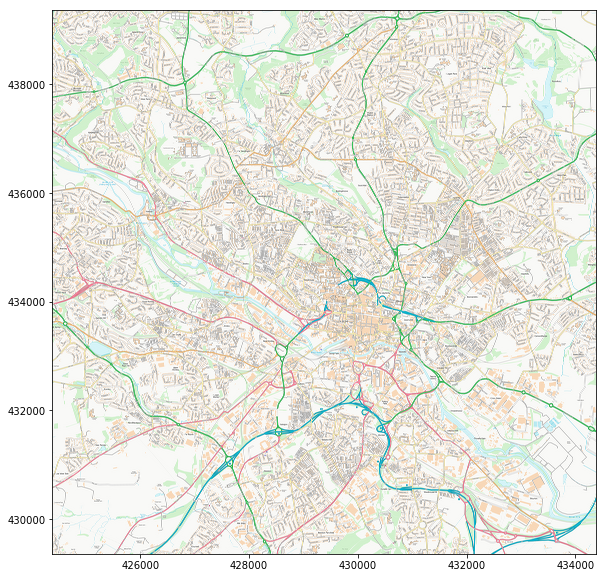

In [5]:
ex = tilemapbase.ordnancesurvey.Extent.from_centre_lonlat(-1.55532, 53.80474, xsize=10000)
plotter = tilemapbase.ordnancesurvey.Plotter(ex, source)

fig, ax = plt.subplots(figsize=(10,10))
plotter.plot(ax)

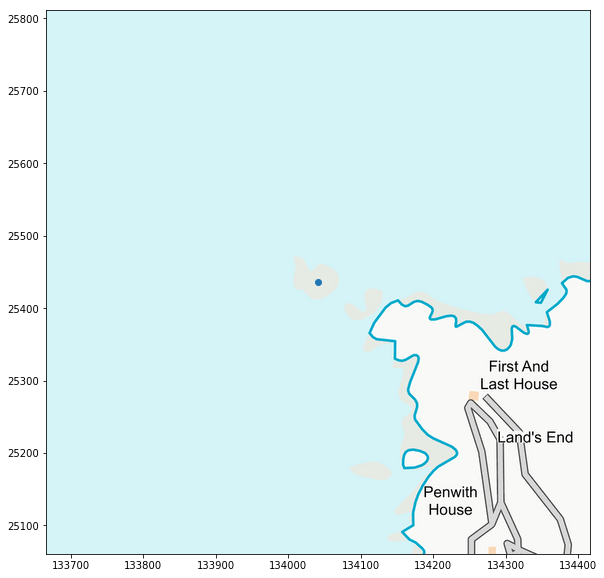

In [6]:
ex = tilemapbase.ordnancesurvey.Extent.from_centre_lonlat(-5.71808, 50.06942, xsize=750)
source = tilemapbase.ordnancesurvey.OpenMapLocal()
plotter = tilemapbase.ordnancesurvey.Plotter(ex, source)

fig, ax = plt.subplots(figsize=(10,10))
plotter.plot(ax)

x, y = tilemapbase.ordnancesurvey.project(-5.71808, 50.06942)
ax.scatter([x], [y])
None

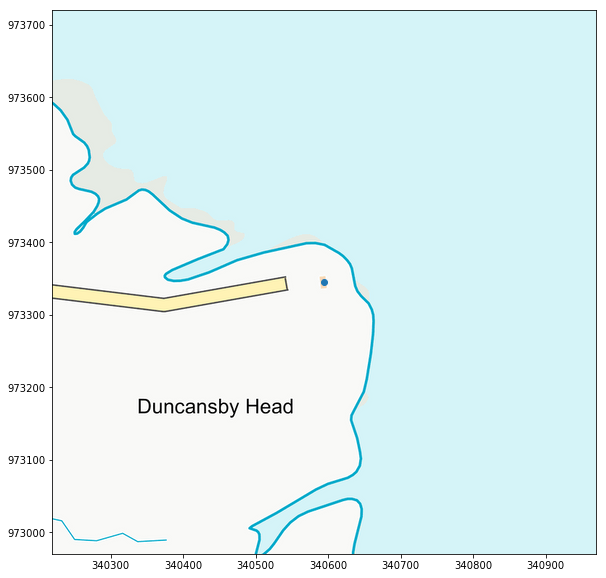

In [7]:
ex = tilemapbase.ordnancesurvey.Extent.from_centre_lonlat(-3.02516, 58.64389, xsize=750)
source = tilemapbase.ordnancesurvey.OpenMapLocal()
plotter = tilemapbase.ordnancesurvey.Plotter(ex, source)

fig, ax = plt.subplots(figsize=(10,10))
plotter.plot(ax)

x, y = tilemapbase.ordnancesurvey.project(-3.02516, 58.64389)
ax.scatter([x], [y])
None

# Again, with VectorMap District

We plot these at the same size (as a test of the code); but you can see that the tiles are slightly over-zoomed...

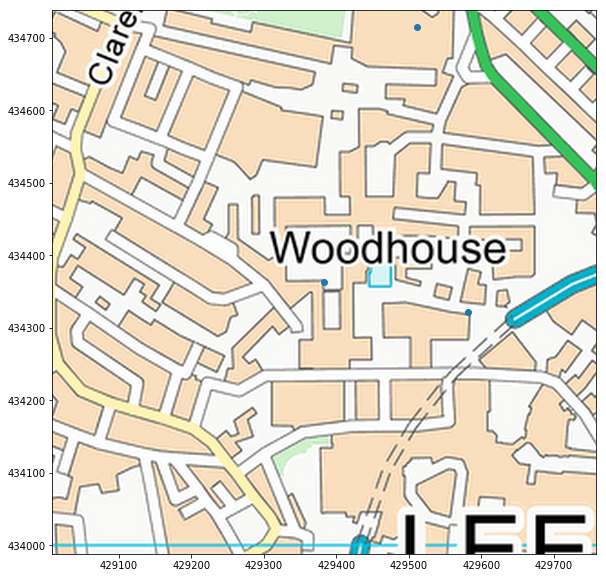

In [8]:
ex = tilemapbase.ordnancesurvey.Extent.from_centre_lonlat(-1.55532, 53.80474, xsize=750)
source = tilemapbase.ordnancesurvey.VectorMapDistrict()
plotter = tilemapbase.ordnancesurvey.Plotter(ex, source)

fig, ax = plt.subplots(figsize=(10,10))
plotter.plot(ax)

x, y = tilemapbase.ordnancesurvey.project(-1.55532, 53.80474)
x1, y1 = tilemapbase.ordnancesurvey.project(-1.553347, 53.807893)
x2, y2 = tilemapbase.ordnancesurvey.project(-1.552304, 53.804356)
ax.scatter([x, x1, x2], [y, y1, y2])
None

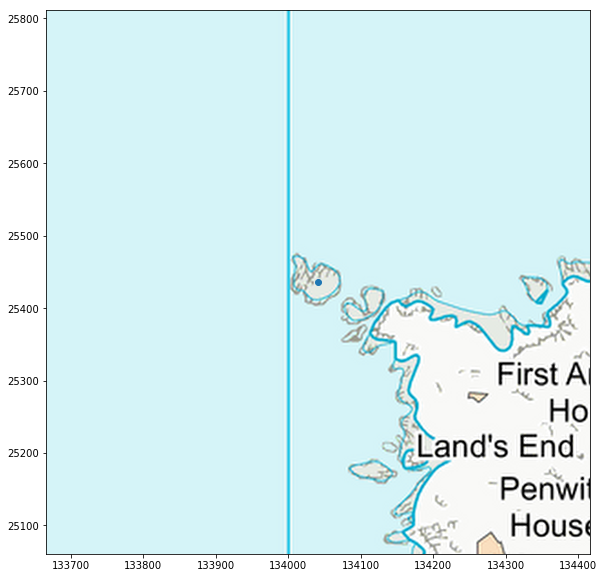

In [9]:
ex = tilemapbase.ordnancesurvey.Extent.from_centre_lonlat(-5.71808, 50.06942, xsize=750)
plotter = tilemapbase.ordnancesurvey.Plotter(ex, source)

fig, ax = plt.subplots(figsize=(10,10))
plotter.plot(ax)

x, y = tilemapbase.ordnancesurvey.project(-5.71808, 50.06942)
ax.scatter([x], [y])
None

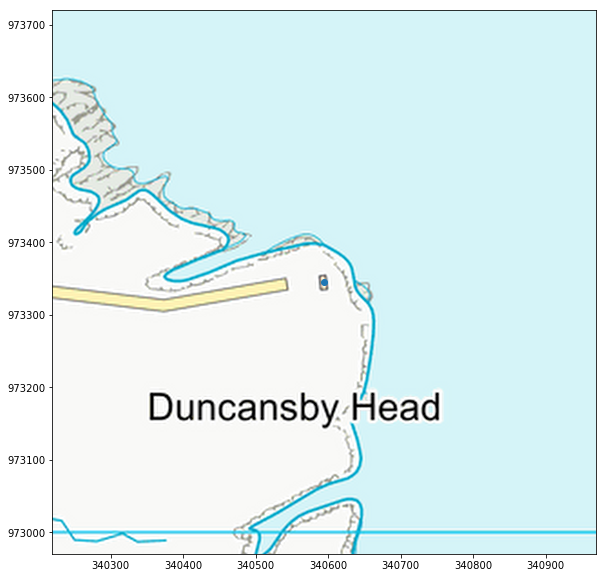

In [10]:
ex = tilemapbase.ordnancesurvey.Extent.from_centre_lonlat(-3.02516, 58.64389, xsize=750)
plotter = tilemapbase.ordnancesurvey.Plotter(ex, source)

fig, ax = plt.subplots(figsize=(10,10))
plotter.plot(ax)

x, y = tilemapbase.ordnancesurvey.project(-3.02516, 58.64389)
ax.scatter([x], [y])
None

# With smaller tiles

SE 29383 34363


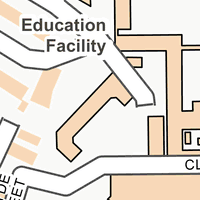

In [11]:
source = tilemapbase.ordnancesurvey.OpenMapLocal()
source = tilemapbase.ordnancesurvey.TileSplitter(source, 200)

x, y = tilemapbase.ordnancesurvey.project(-1.55532, 53.80474)
print(tilemapbase.ordnancesurvey.coords_to_os_national_grid(x, y))

source("SE 29383 34363")

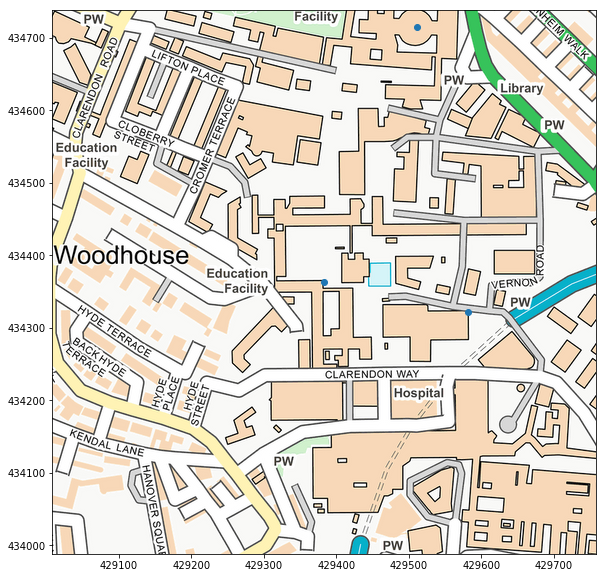

In [12]:
ex = tilemapbase.ordnancesurvey.Extent.from_centre_lonlat(-1.55532, 53.80474, xsize=750)
plotter = tilemapbase.ordnancesurvey.Plotter(ex, source)

fig, ax = plt.subplots(figsize=(10,10))
plotter.plot(ax)

x, y = tilemapbase.ordnancesurvey.project(-1.55532, 53.80474)
x1, y1 = tilemapbase.ordnancesurvey.project(-1.553347, 53.807893)
x2, y2 = tilemapbase.ordnancesurvey.project(-1.552304, 53.804356)
ax.scatter([x, x1, x2], [y, y1, y2])
None

# 250k Raster Tiles

What I think of as "road atlas" sized tiles.

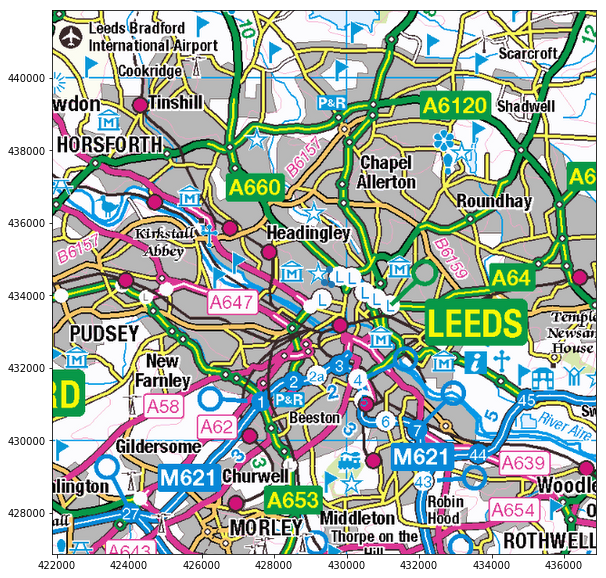

In [13]:
source = tilemapbase.ordnancesurvey.TwoFiftyScale()

ex = tilemapbase.ordnancesurvey.Extent.from_centre_lonlat(-1.55532, 53.80474, xsize=15000)
plotter = tilemapbase.ordnancesurvey.Plotter(ex, source)

fig, ax = plt.subplots(figsize=(10,10))
plotter.plot(ax)

x, y = tilemapbase.ordnancesurvey.project(-1.55532, 53.80474)
x1, y1 = tilemapbase.ordnancesurvey.project(-1.553347, 53.807893)
x2, y2 = tilemapbase.ordnancesurvey.project(-1.552304, 53.804356)
ax.scatter([x, x1, x2], [y, y1, y2])
None

# Miniscale

In [14]:
source = tilemapbase.ordnancesurvey.MiniScale()
source.filenames

['MiniScale_(mono)_R19.tif',
 'MiniScale_(relief1)_R19.tif',
 'MiniScale_(relief2)_R19.tif',
 'MiniScale_(standard)_R19.tif',
 'MiniScale_(std_with_grid)_R19.tif']

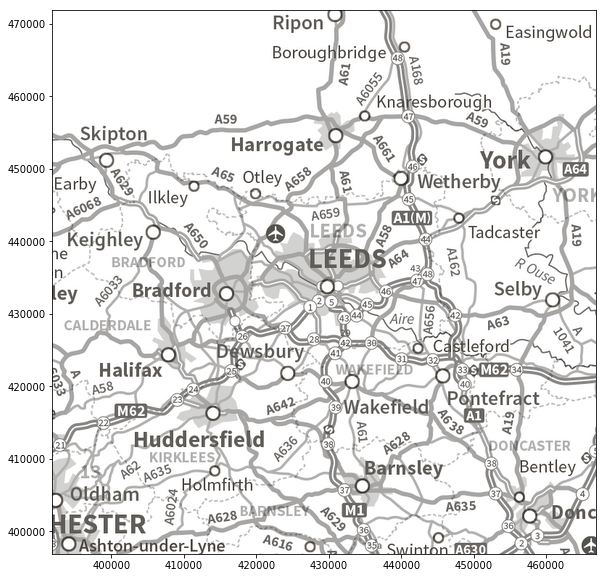

In [15]:
ex = tilemapbase.ordnancesurvey.Extent.from_centre_lonlat(-1.55532, 53.80474, xsize=75000)
plotter = tilemapbase.ordnancesurvey.Plotter(ex, source)

fig, ax = plt.subplots(figsize=(10,10))
plotter.plot(ax)

# Overview

['GBOverview.tif', 'GBOverviewPlus.tif']


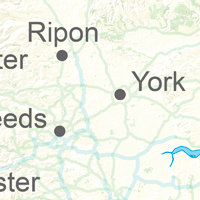

In [16]:
source = tilemapbase.ordnancesurvey.OverView()
print(source.filenames)
source.filename = 'GBOverviewPlus.tif'
source("SE 1 2")

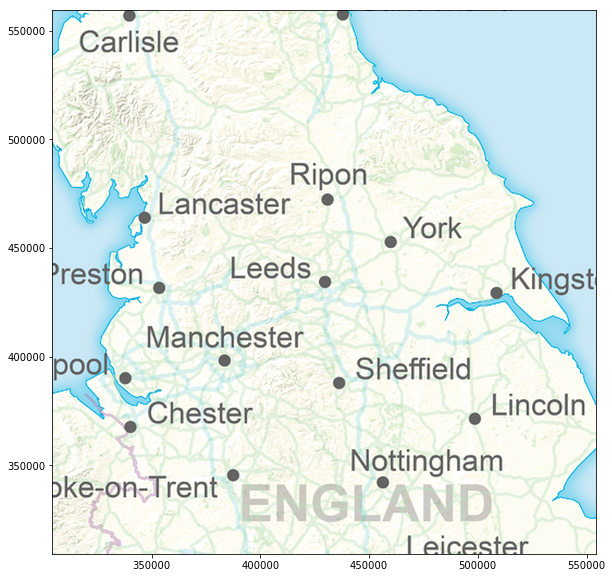

In [17]:
ex = tilemapbase.ordnancesurvey.Extent.from_centre_lonlat(-1.55532, 53.80474, xsize=250000)
plotter = tilemapbase.ordnancesurvey.Plotter(ex, source)

fig, ax = plt.subplots(figsize=(10,10))
plotter.plot(ax)